In [1]:
from mcmr_crosstalk_pauli_98_qubit import MCMR_Crosstalk_Pauli_98_Qubit_Experiment
from selene_sim import DepolarizingErrorModel, Stim, Quest
from pecos_selene import PecosGeneralErrorModel

In [2]:
from collections import Counter
from hugr.qsystem.result import QsysResult
from selene_sim import build, Stim
from pecos_selene import qsystem_model_alpha
from selene_anduril import AndurilRuntimePlugin as AndurilRuntime
from selene_sim import SimpleLeakageErrorModel
from selene_eldarion import register_eldarion, QtmPlatformPlugin
register_eldarion()

In [3]:
focus_qubits = [0]

seq_lengths = [1,10]#, 200, 400] #, 200, 400, 600 # Perhaps do just 1 and 200...?

# ensure that the pickle filename is unique
import datetime
x = datetime.datetime.now()
filename = f'./exp_MCMR_Crosstalk_Pauli_98_q{focus_qubits}_{x}.p'
print(filename)

exp = MCMR_Crosstalk_Pauli_98_Qubit_Experiment(focus_qubits, seq_lengths, filename=filename)
exp.add_settings()

./exp_MCMR_Crosstalk_Pauli_98_q[0]_2025-10-02 14:38:12.597113.p


### Run local simulation using Selene

In [4]:
# Setup error model

# error_model = PecosGeneralErrorModel(
#         p_meas_crosstalk=1e-4,
#         p_prep_crosstalk=1e-4
#     )

error_model = qsystem_model_alpha(random_seed=12, p_meas_crosstalk=1e-3,p_prep_crosstalk=1e-3)


/Users/victor.colussi/Documents/Github_Repos/circuit-benchmarks-guppy/.venv_2/lib/python3.12/site-packages/pecos_selene/error_models/named.py:35: UserWarning: 


* The crosstalk channels are implemented using a very naive model.

* Leakage and memory error are implemented as in H1/H2, but it is expectedthese will change significantly in Helios.

* The noise parameter values are rough estimates, using a combination of target values for Helios and values from H2's model. These have not been verified by benchmarking experiments on the device.

* Anduril (the component that decides ion transport) does not currently report accurate timing estimates. This affects the memory error.

  warnings.warn(msg)


In [5]:
# simulate experiment

shots = 100
simulator = Stim()

exp.sim(shots, error_model = error_model, simulator=simulator)


Simulating ...
1/12 circuits complete
2/12 circuits complete
3/12 circuits complete
4/12 circuits complete
5/12 circuits complete
6/12 circuits complete
7/12 circuits complete
8/12 circuits complete
9/12 circuits complete
10/12 circuits complete
11/12 circuits complete
12/12 circuits complete


/Users/victor.colussi/Documents/Github_Repos/circuit-benchmarks-guppy/mcmr_crosstalk_pauli_98_qubit.py:599: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(fit_func, x, y) #, p0=[0.4, 0.9], bounds=([0,0], [0.5,1]))
/Users/victor.colussi/Documents/Github_Repos/circuit-benchmarks-guppy/mcmr_crosstalk_pauli_98_qubit.py:249: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(fit_func, x, y)


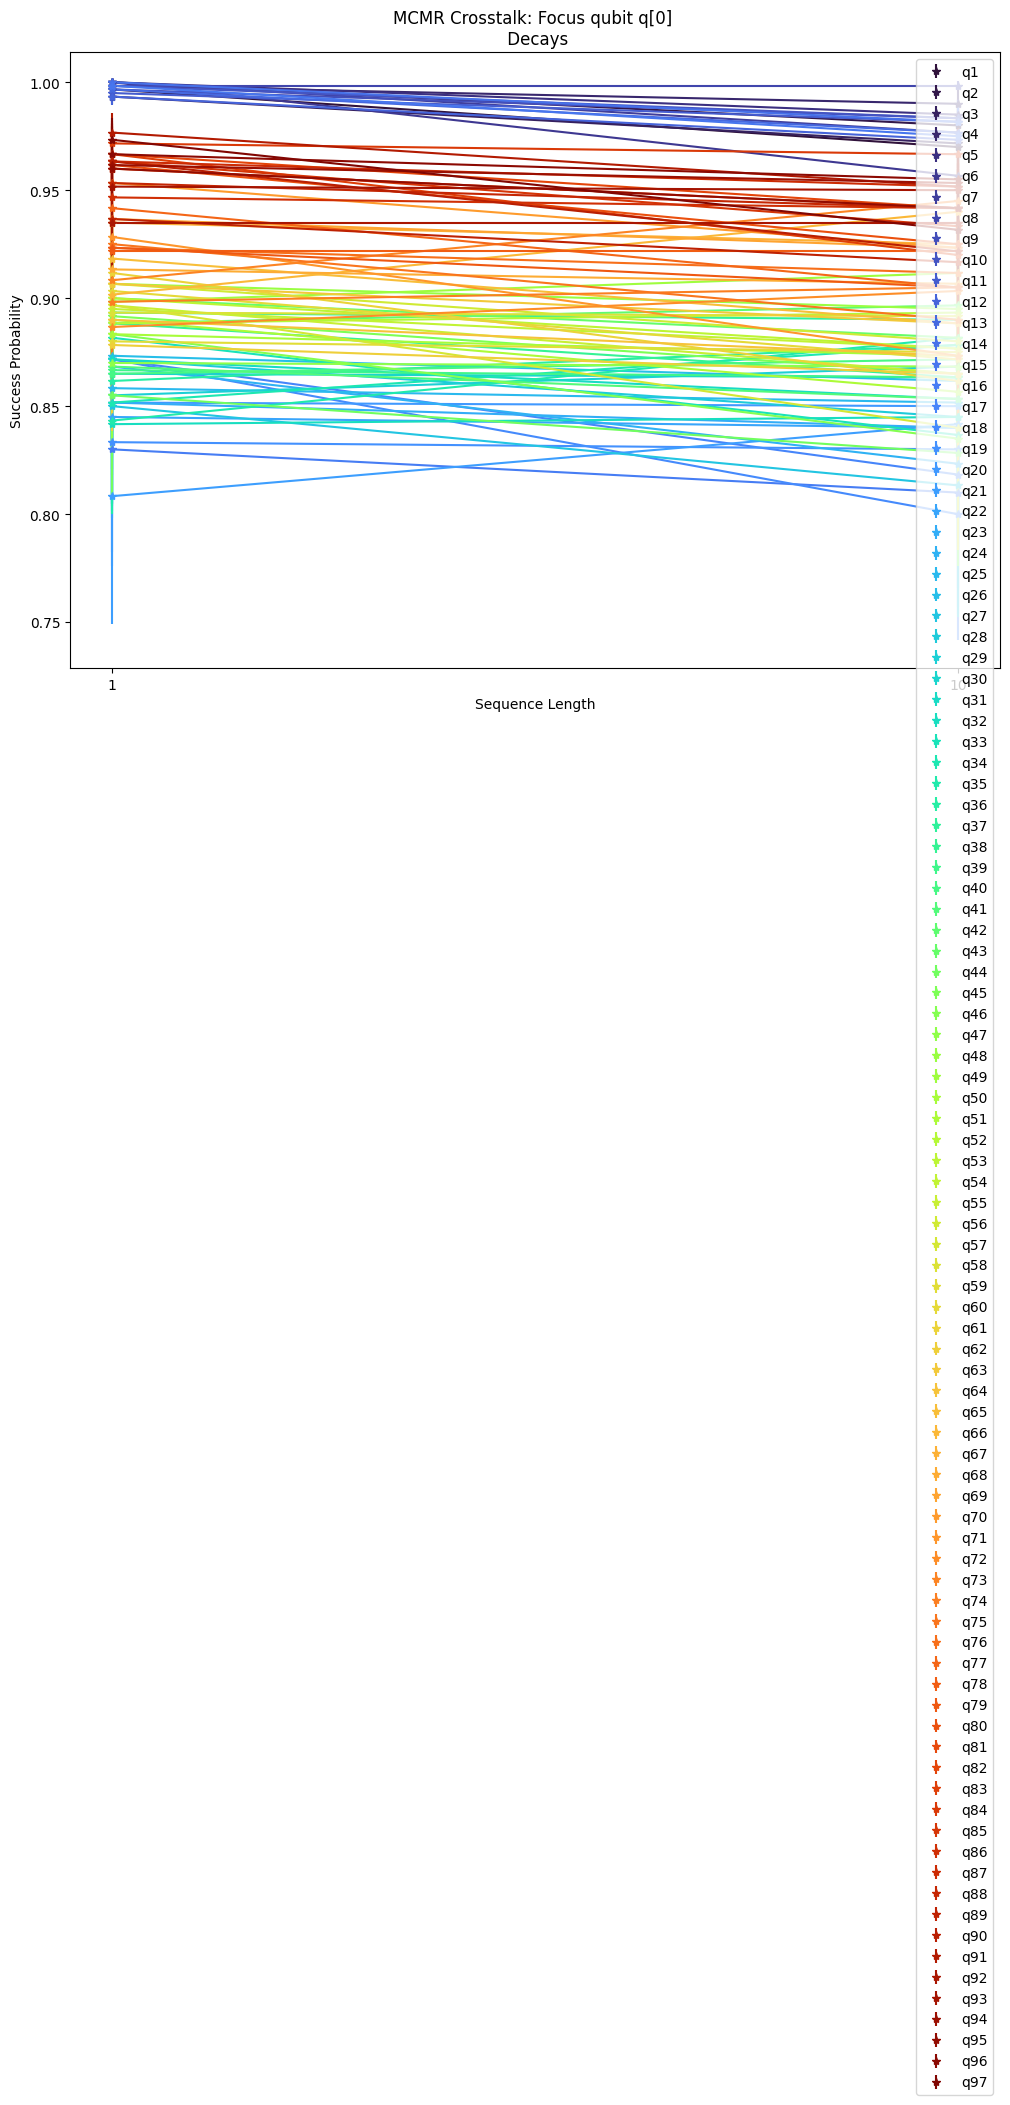

Average State Infidelities
------------------------------
qubit 1: 0.002963 +/- 0.001631
qubit 2: 0.002222 +/- 0.000852
qubit 3: 0.002407 +/- 0.001323
qubit 4: 0.000926 +/- 0.000808
qubit 5: 0.001667 +/- 0.000818
qubit 6: 0.004815 +/- 0.001754
qubit 7: 0.002593 +/- 0.001095
qubit 8: 0.0 +/- 0.00033
qubit 9: 0.001481 +/- 0.001024
qubit 10: 0.001667 +/- 0.000998
qubit 11: 0.001481 +/- 0.001221
qubit 12: 0.002222 +/- 0.001158
qubit 13: 0.002222 +/- 0.001121
qubit 14: 0.002037 +/- 0.000873
qubit 15: 0.002593 +/- 0.001075
qubit 16: 0.002222 +/- 0.00932
qubit 17: 0.005926 +/- 0.008664
qubit 18: 0.007963 +/- 0.008242
qubit 19: 0.00037 +/- 0.007875
qubit 20: 0.000185 +/- 0.007088
qubit 21: -0.003704 +/- 0.008869
qubit 22: 0.000556 +/- 0.007382
qubit 23: 0.001296 +/- 0.008529
qubit 24: 0.005 +/- 0.007897
qubit 25: 0.000741 +/- 0.007944
qubit 26: 0.001296 +/- 0.005789
qubit 27: 0.004074 +/- 0.008372
qubit 28: 0.002963 +/- 0.006438
qubit 29: -0.001481 +/- 0.00639
qubit 30: 0.000185 +/- 0.006983
q

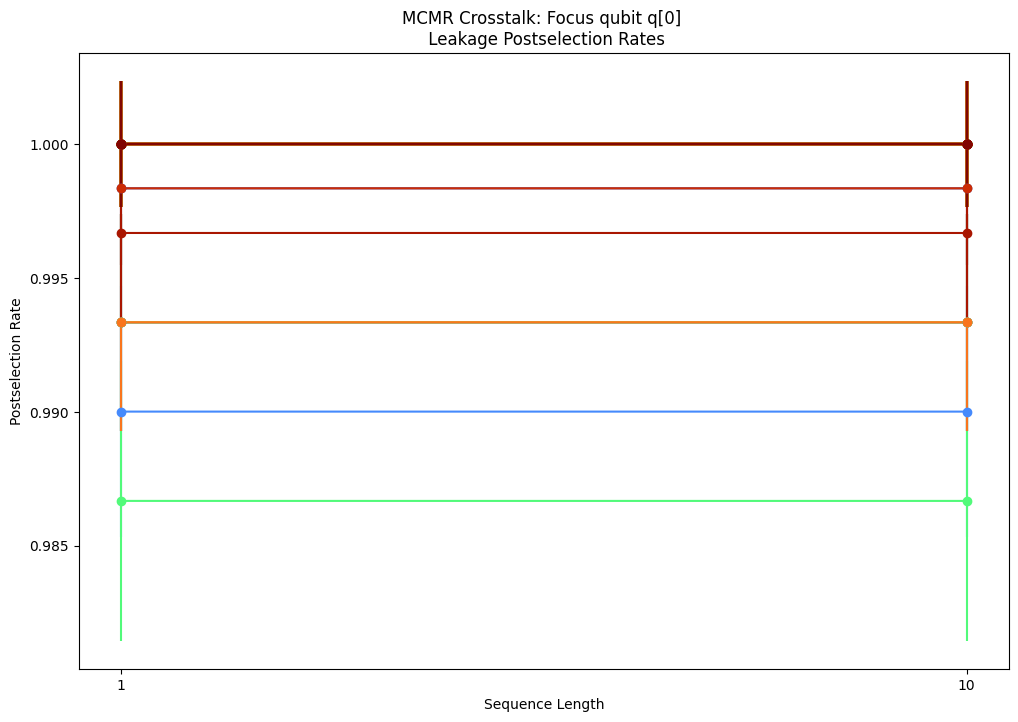

Average leakage rates
------------------------------
qubit 1: 0.0 +/- 0.000369
qubit 2: 0.0 +/- 0.000369
qubit 3: 0.0 +/- 0.000637
qubit 4: 0.0 +/- 0.000369
qubit 5: 0.0 +/- 0.000369
qubit 6: 0.0 +/- 0.000369
qubit 7: 0.0 +/- 0.000369
qubit 8: 0.0 +/- 0.000369
qubit 9: 0.0 +/- 0.000452
qubit 10: 0.0 +/- 0.000369
qubit 11: 0.0 +/- 0.000369
qubit 12: 0.0 +/- 0.000637
qubit 13: 0.0 +/- 0.000369
qubit 14: 0.0 +/- 0.000369
qubit 15: 0.0 +/- 0.000369
qubit 16: 0.0 +/- 0.000369
qubit 17: 0.0 +/- 0.000369
qubit 18: 0.0 +/- 0.000735
qubit 19: 0.0 +/- 0.000369
qubit 20: 0.0 +/- 0.000369
qubit 21: 0.0 +/- 0.000369
qubit 22: 0.0 +/- 0.000369
qubit 23: 0.0 +/- 0.000369
qubit 24: 0.0 +/- 0.000369
qubit 25: 0.0 +/- 0.000369
qubit 26: 0.0 +/- 0.000369
qubit 27: 0.0 +/- 0.000369
qubit 28: 0.0 +/- 0.000369
qubit 29: 0.0 +/- 0.000369
qubit 30: 0.0 +/- 0.000369
qubit 31: 0.0 +/- 0.000369
qubit 32: 0.0 +/- 0.000369
qubit 33: 0.0 +/- 0.000369
qubit 34: 0.0 +/- 0.000369
qubit 35: 0.0 +/- 0.000369
qubit 36: 0

/Users/victor.colussi/Documents/Github_Repos/circuit-benchmarks-guppy/mcmr_crosstalk_pauli_98_qubit.py:599: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(fit_func, x, y) #, p0=[0.4, 0.9], bounds=([0,0], [0.5,1]))


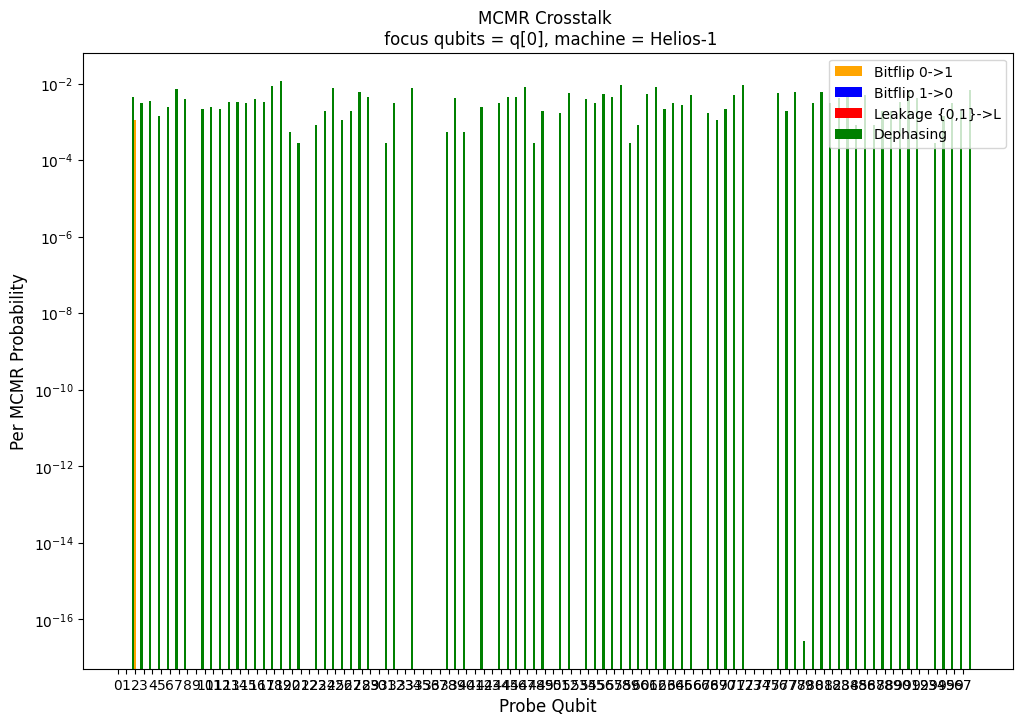

Average error rates
--------------------------------------------------
Bitflip 0->1: 1.1e-05 +/- 1.1e-05
Bitflip 1->0: 0.0 +/- 0.0
Leakage {0,1}->L: 0.0 +/- 0.0
Dephasing: 0.002572 +/- 0.000349
--------------------------------------------------


Error channel estimates of fidelities
--------------------------------------------------
Average state infidelity:  0.001716
Average process infidelity:  0.002574
--------------------------------------------------






In [6]:
exp.analyze_results()

In [7]:
exp.results

{(10,
  0,
  '00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000'): {'00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000': 93,
  '00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000200000': 2,
  '00000000000000000000000000000000000000000000000000000000000000000000000000000000000000020000000000': 1,
  '00000000000000000020000000000000000000000000000000000000000000000000000000000000000000000000000000': 1,
  '00000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000': 1,
  '00000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000': 1,
  '00000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000': 1},
 (10,
  1,
  '00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000'): {'1000000000000000

In [27]:
# save experiment object to working directory

exp.save()

### Submit to Quantinuum Hardware or Emulator backend using Nexus

In [4]:
# Choose domain and login to Nexus

import qnexus
from qnexus.config import CONFIG

CONFIG.domain = "qa.myqos.com"
qnexus.login()

🌐 Browser log in initiated.


╭────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                        │
│         Confirm that the browser shows the following code and click 'allow device':    │
│                                                                                        │
│                                      OHlaRc                                            │
│                                                                                        │
╰────────────────────────────────────────────────────────────────────────────────────────╯

Browser didn't open automatically? Use this link: https://qa.myqos.com/auth/device/browser?otp=OHlaRcRjDe7lk4WJ9cXIP2DMCPudI4OqKPeNBVNtEHXTlYpNbr33_-YqdNCzwoDKvX_xWBOzkOz-UafRIqJpWA
✅ Successfully logged in as victor.colussi@quantinuum.com using the browser.


In [5]:
# choose nexus project and setup quantinuum backend config

project = qnexus.projects.get_or_create(name='MCMR-Crosstalk-example-project')
qnexus.context.set_active_project(project)

backend_config = qnexus.QuantinuumConfig(device_name='Helios-1E', simulator='stabilizer', max_cost=1000000)

In [5]:
# Choose domain and login to Nexus
#### TO SUBMIT TO HARDWARE #####

import qnexus
# from qnexus.config import CONFIG

# CONFIG.domain = "qa.myqos.com"
qnexus.login()

🌐 Browser log in initiated.


╭────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                        │
│         Confirm that the browser shows the following code and click 'allow device':    │
│                                                                                        │
│                                      iTa8nj                                            │
│                                                                                        │
╰────────────────────────────────────────────────────────────────────────────────────────╯

Browser didn't open automatically? Use this link: https://nexus.quantinuum.com/auth/device/browser?otp=iTa8njKBShPTT6D6Kz645l1npY6oNNEEifNGvpY60CTKRIZ7ph_MDME4BKH3OtdnazPmtJn4ABWOuwn9D0SbAg
✅ Successfully logged in as victor.colussi@quantinuum.com using the browser.


In [6]:
# choose nexus project and setup quantinuum backend config
#### TO SUBMIT TO HARDWARE #####

project = qnexus.projects.get_or_create(name='MCMR-Crosstalk-example-project')
qnexus.context.set_active_project(project)

backend_config = qnexus.QuantinuumConfig(device_name='Helios-1', max_cost=1000000)

In [7]:
# submit experiment. Returns a qnexus ExecuteJobRef

shots = 100

execute_job_ref = exp.submit(shots, backend_config, save = True) # making this true by default will make it possible to retrieve later.

In [8]:
# inspect status of the execution job

qnexus.jobs.status(execute_job_ref)

JobStatus(status=<StatusEnum.SUBMITTED: 'Circuit has been submitted.'>, message='Job has been submitted to Nexus.', error_detail=None, completed_time=None, queued_time=None, submitted_time=datetime.datetime(2025, 9, 9, 7, 17, 14, 719153, tzinfo=datetime.timezone.utc), running_time=None, cancelled_time=None, error_time=None, queue_position=None)

In [17]:
# retrieve results

exp.retrieve(execute_job_ref)

Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider updating your pytket version.
Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider updating your pytket version.
Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider updating your pytket version.
Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider updating your pytket version.
Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider updating your pytket version.
Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider updating your pytket version.
Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider updating your pytket version.
Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider updating your pytket version.
Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider updating your pytket version.
Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider 

### Analyze experiment results

/Users/victor.colussi/Documents/Github_Repos/circuit-benchmarks-guppy/mcmr_crosstalk_pauli.py:414: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(fit_func, x, y) #, p0=[0.4, 0.9], bounds=([0,0], [0.5,1]))
/Users/victor.colussi/Documents/Github_Repos/circuit-benchmarks-guppy/mcmr_crosstalk_pauli.py:219: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(fit_func, x, y)


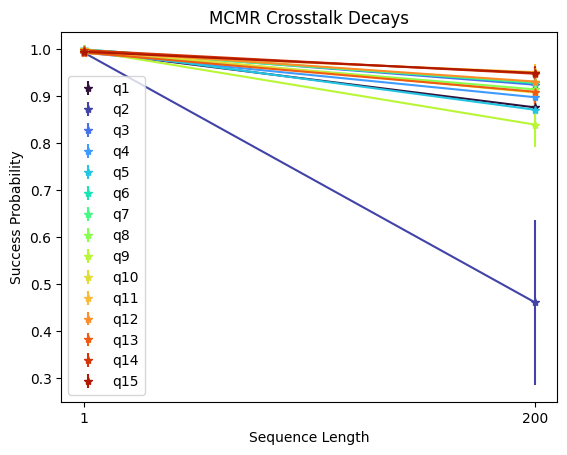

/Users/victor.colussi/Documents/Github_Repos/circuit-benchmarks-guppy/mcmr_crosstalk_pauli.py:259: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(fit_func, x, y, p0=[0.4, 0.9], bounds=([0,0], [1,1]), sigma=yerr)


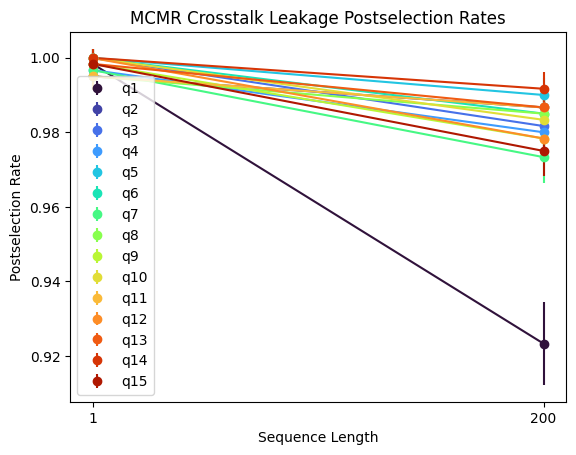

Qubit average leakge rate: 0.999904 +/- inf
Average Infidelities
------------------------------
qubit 1: 0.000603 +/- 8.7e-05
qubit 2: 0.002672 +/- 0.000883
qubit 3: 0.000377 +/- 0.000102
qubit 4: 0.000477 +/- 0.000123
qubit 5: 0.000645 +/- 0.000171
qubit 6: 0.00036 +/- 0.000113
qubit 7: 0.000335 +/- 0.000118
qubit 8: 0.000402 +/- 0.000139
qubit 9: 0.000796 +/- 0.000244
qubit 10: 0.000461 +/- 0.000159
qubit 11: 0.000201 +/- 8.5e-05
qubit 12: 0.000335 +/- 0.000115
qubit 13: 0.000419 +/- 0.000134
qubit 14: 0.000251 +/- 8.3e-05
qubit 15: 0.000226 +/- 6.7e-05
------------------------------
Qubit Average: 0.000571 +/- 6.7e-05


In [18]:
exp.analyze_results()

In [4]:
# save experiment object to working directory

exp.save()

In [4]:
# generate dfl

from qmcparser.parser import get_dfl

output_filename = f'./dfl/dfl_MCMR_Crosstalk_Pauli_98_qubits_q{focus_qubits}_{x}.cl'
dfl = get_dfl(exp.make_circuit(exp.settings[-1]), output_file_name=output_filename)

Processing shot 0
